### **Agata Semerjak, 402426**  
Laboratorium nr 1, 13.03.2023  
Grupa nr 2, poniedziałek 15:00

### 5. Analiza zbioru danych New York Times

5.1  Załaduj zbiór danych NYT jako DataFrame

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./nyt-frame.csv', header=0)
data = df.iloc[:, 9:]
array = data.values
df.head()

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
reds = df[df['class.labels'] == "art"].index
blues = df[df['class.labels'] == "music"].index

In [3]:
data.head()

,abandoned,abc,ability,able,about,above,abroad,absorbed,absorbing,abstract,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,0.0,0.0,0.0,0.000000,0.053266,0.000000,0.000000,0.0,0.0,0.021566,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.039866,0.000000,0.000000,0.000000,0.0,0.0,0.043458,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.053641,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.012511,0.000000,0.041018,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5.2 Wyświetl 20 losowych wybranych elementów słownika

In [4]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['competition' 'need' 'run' 'jonathan' 'according' 'dimension' 'afford'
 'creates' 'gently' 'designers' 'charm' 'ruscha' 'quick' 'strike' 'cover'
 'archetypal' 'improvisations' 'kennedy' 'multimedia' 'occasional']


5.3-6 Dokonaj transformacji PCA. Dla pierwszego komponentu wiodącego wyświetl 15 elementów o największej wartości. Dla pierwszego komponentu wiodącego wyświetl 15 elementów o najmniejszej wartości. Powtórz eksperyment dla drugiego komponentu wiodącego.

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(array)

for i in [0, 1]:
    top_components = []

    for column_name, component_value in zip(data.columns, pca.components_[i]):
        top_components.append((component_value.round(2), column_name))

    top_components = sorted(top_components, key=lambda x: x[0], reverse=True)

    print(f"\n\n{i + 1}. komponent wiodący")
    print(f'15 elementów o największej wartości:')
    print(top_components[:15])
    print(f'\n15 elementów o najmniejszej wartości:')
    print(top_components[-15:][::-1])



1. komponent wiodący
15 elementów o największej wartości:
[(0.26, 'she'), (0.25, 'her'), (0.2, 'ms'), (0.15, 'i'), (0.13, 'said'), (0.11, 'mother'), (0.1, 'cooper'), (0.09, 'my'), (0.09, 'painting'), (0.07, 'he'), (0.07, 'im'), (0.07, 'mrs'), (0.07, 'paintings'), (0.07, 'process'), (0.06, 'artists')]

15 elementów o najmniejszej wartości:
[(-0.11, 'music'), (-0.09, 'trio'), (-0.07, 'theater'), (-0.07, 'orchestra'), (-0.06, 'opera'), (-0.06, 'composers'), (-0.05, 'y'), (-0.05, 'theaters'), (-0.05, 'program'), (-0.05, 'players'), (-0.05, 'm'), (-0.05, 'jersey'), (-0.05, 'festival'), (-0.05, 'east'), (-0.04, 'wolfgang')]


2. komponent wiodący
15 elementów o największej wartości:
[(0.22, 'her'), (0.21, 'she'), (0.16, 'theater'), (0.13, 'opera'), (0.12, 'ms'), (0.08, 'hour'), (0.08, 'i'), (0.07, 'festival'), (0.07, 'la'), (0.07, 'music'), (0.07, 'musical'), (0.07, 'orchestra'), (0.07, 'production'), (0.07, 'sang'), (0.07, 'songs')]

15 elementów o najmniejszej wartości:
[(-0.15, 'art'), 

Dla **pierwszego** komponentu najbardziej znaczące słowa to te określające osobę (she, her, ms, i, he, im, mrs) oraz kilka słów ogólnie związanych ze sztuką (paintings, artists). Interesujący jest fakt, że największą wartość mają zaimki żeńskie i dopiero na 10. miesju widnieje męskie 'he'.  
Najmniej znaczące słowa związane są z muzyką.  
  
Dla **drugiego** komponentu pierwsze miejsca również zajmują słowa związane z wyrażeniem osoby, natomiast już od trzeciego miejsca występują słowa związane z muzyką.
Słowa o namniejszej wartości można powiązać z malarstwem, czy też z rzeźbiarstwem (sztuką muzealną).

5.7 Dokonaj wizualizacji wektorów cech zrzutowanych na 2(3) pierwsze komponenty wiodące.

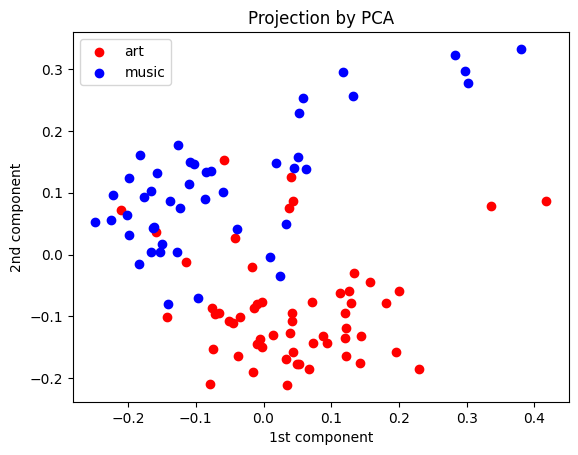

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red", label="art")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue", label="music")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend()
plt.show()

5.8  Narysuj wykres zależności wartości wariancji od numeru kierunku wiodącego k.

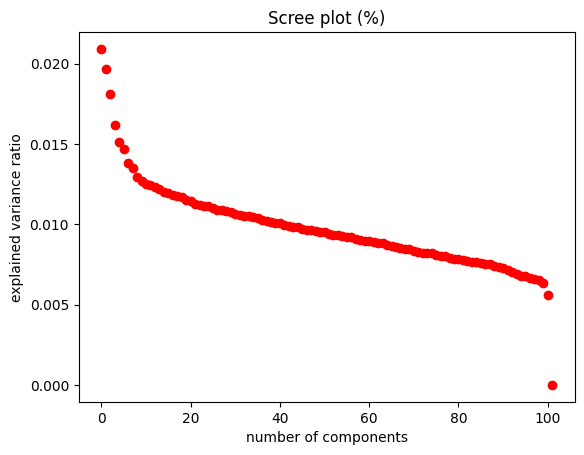

Po wykonaniu projekcji na pierwsze 10 komponentów wiodących pozostaje zachowane 16% wariancji


In [7]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.title("Scree plot (%)")
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.show()
print("Po wykonaniu projekcji na pierwsze 10 komponentów wiodących pozostaje zachowane {0:.0f}% wariancji".format(sum(variance_ratio[:10])*100))

### 6. Analiza zbioru danych 04Cars

6.1  Załaduj zbiór danych 04Cars jako DataFrame.

In [8]:
df = pd.read_csv('./04cars-data.csv', header=0)
data = df.iloc[:, -11:]
df.head()

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [9]:
data.head()

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68


6.2 Znormalizuj dane, zapewniając, że dla każdej cechy średnia arytmetyczne wynosi 0, a wariancja 1.

In [10]:
data = data.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
array = data.values
data.head()

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,0.533537,0.478926,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.492267,1.098999,0.909409,0.214799
1,0.652424,0.595455,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.510681,1.098999,0.909409,0.214799
2,0.188283,0.161796,0.367351,0.162996,0.719521,-0.629504,-0.756487,1.301045,-0.171012,0.305088,1.699215
3,2.866153,2.767267,0.071585,0.162996,1.075328,-0.629504,-0.579057,-0.537472,-1.017686,-0.828013,-0.082084
4,-0.477128,-0.484865,-1.111480,-1.179122,-0.205577,0.700704,0.662958,-1.068631,-0.876574,-0.979094,-0.972733


6.3 Dokonaj transformacji PCA dla wejściowego zbioru danych, a następnie przedstaw zależność bezwzględnej i względnej wartości wariancji od numeru kierunku wiodącego k.

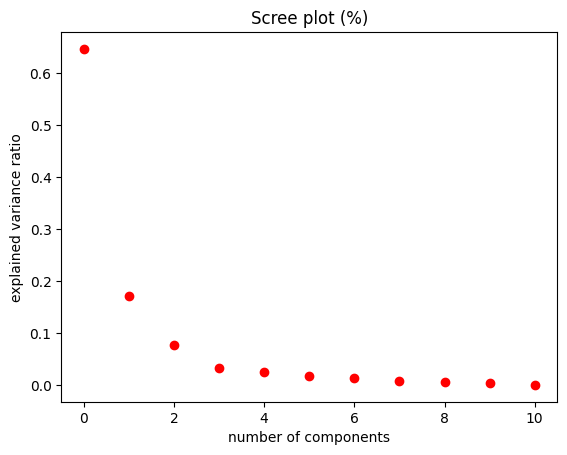

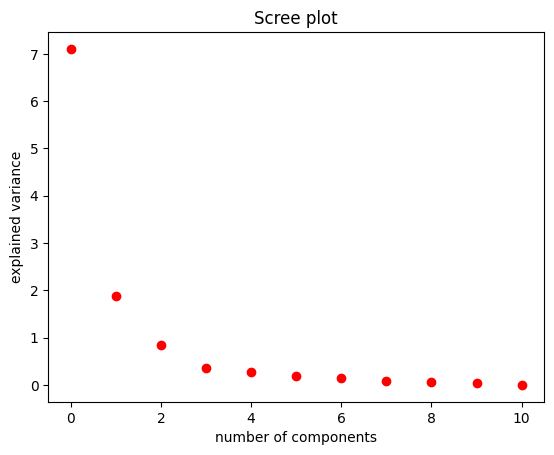

Po wykonaniu projekcji na pierwsze 2 komponenty wiodących pozostaje zachowane 82% wariancji
Po wykonaniu projekcji na pierwsze 3 komponenty wiodących pozostaje zachowane 89% wariancji


In [11]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(array)

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.title("Scree plot (%)")
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.show()

variance = pca.explained_variance_
plt.plot(variance, 'ro')
plt.title("Scree plot")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

print("Po wykonaniu projekcji na pierwsze 2 komponenty wiodących pozostaje zachowane {0:.0f}% wariancji".format(sum(variance_ratio[:2])*100))
print("Po wykonaniu projekcji na pierwsze 3 komponenty wiodących pozostaje zachowane {0:.0f}% wariancji".format(sum(variance_ratio[:3])*100))

6.4 Wyświetl wartości elementów pierwszego i drugiego komponentu wiodącego wraz z odpowiadającą im nazwą cechy.

In [12]:
for i in [0, 1]:
    top_components = []

    for column_name, component_value in zip(data.columns, pca.components_[i]):
        top_components.append((component_value.round(2), column_name))

    top_components = sorted(top_components, key=lambda x: x[0], reverse=True)

    print(f"\n\n{i + 1}. komponent wiodący")
    print(top_components)



1. komponent wiodący
[(0.31, 'City MPG'), (0.31, 'Hwy MPG'), (-0.26, 'Retail Price'), (-0.26, 'Dealer Cost'), (-0.26, 'Len'), (-0.27, 'Wheel Base'), (-0.3, 'Width'), (-0.32, 'HP'), (-0.33, 'Cyl'), (-0.34, 'Weight'), (-0.35, 'Engine Size (l)')]


2. komponent wiodący
[(0.47, 'Retail Price'), (0.47, 'Dealer Cost'), (0.29, 'HP'), (0.08, 'Cyl'), (-0.0, 'City MPG'), (-0.01, 'Hwy MPG'), (-0.02, 'Engine Size (l)'), (-0.17, 'Weight'), (-0.31, 'Width'), (-0.41, 'Len'), (-0.42, 'Wheel Base')]


Największe elementy **pierwszego** komponentu wiodącego wiążą się ze zużyciem paliwa oraz ceną.  
Najmniejsze to dane techniczne dotyczące rozmiaru silnika i masy samochodu.  
  
Największe elementy **drugiego** komponentu wiodącego wiążą się z ceną.  
Najmniejsze to dane techniczne dotyczące rozmiaru koła i wymiarów zewnętrznych samochodu.  

6.5 Dokonaj wizualizacji wektorów cech zrzutowanych na 2(3) pierwsze komponenty wiodące.

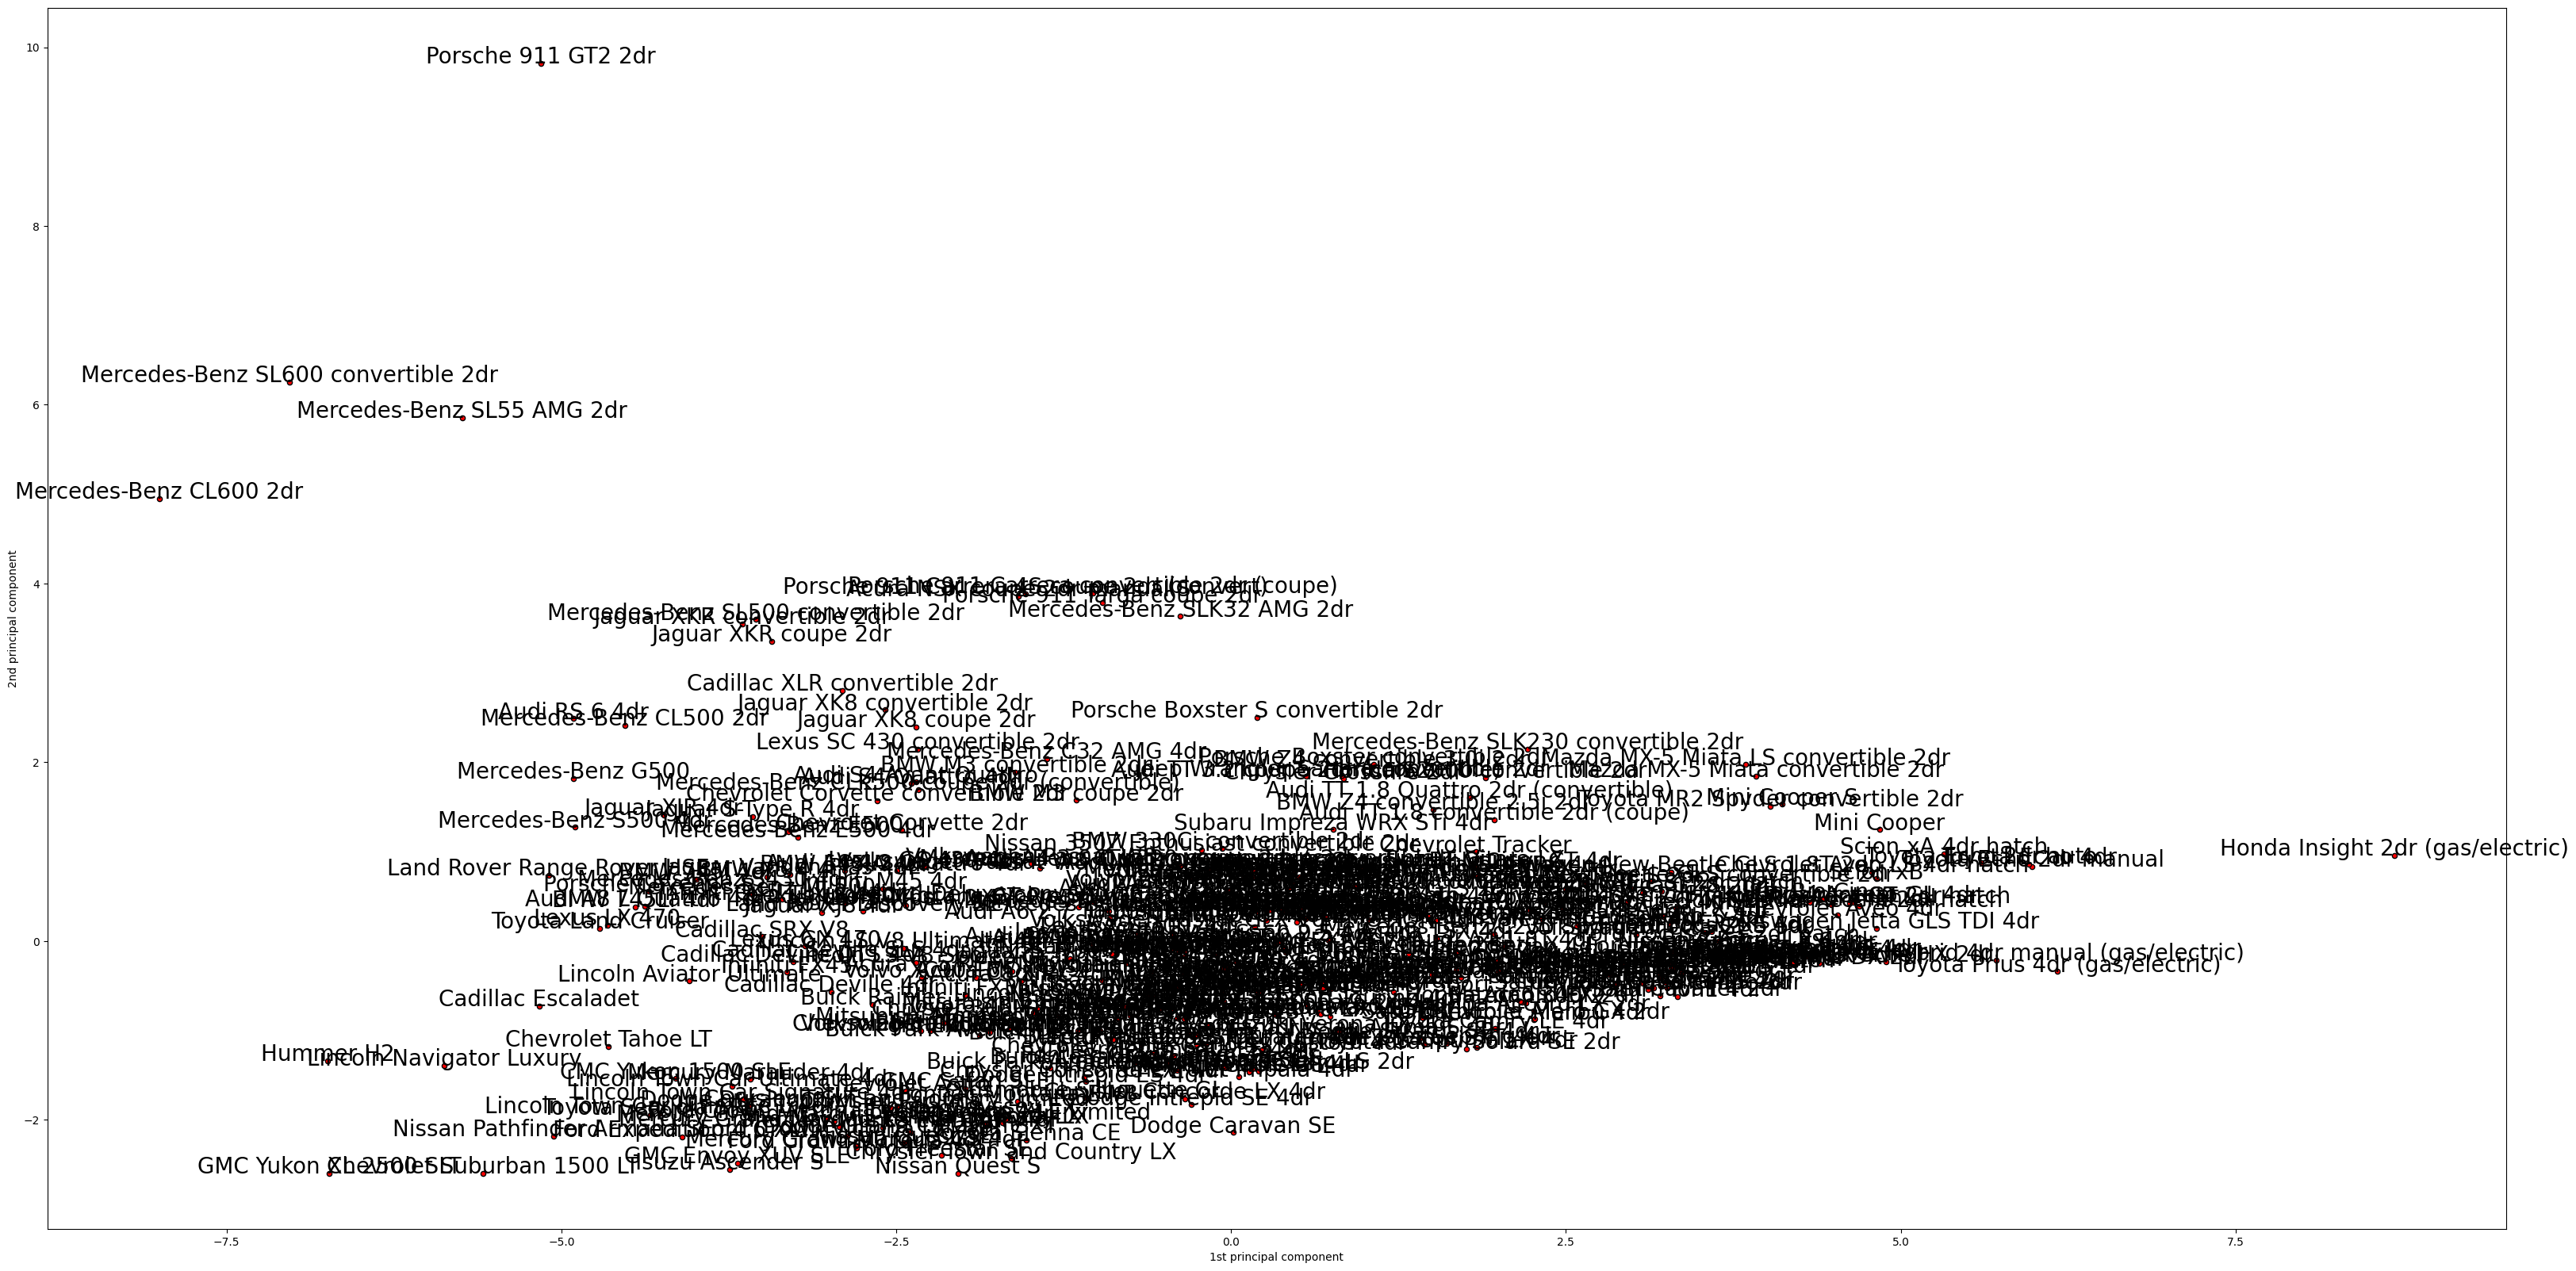

In [13]:
x = X_pca[:, 0]
y = X_pca[:, 1]

n = list(df['Vehicle Name'])

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(x, y, c='red', s=20, edgecolors='k')
ax.title
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), ha='center', size=20)

Dla pierwszego komponentu najważniejszym parametrem było zużycie paliwa, co widać również na powyższym wykresie - po prawej stronie zlokalizowane są modele samochodów głównie hybrydowe, z napędem na gaz lub elektryczne, a zatem najbardziej energooszczędne. Na osi y widnieje zależność ceny samochodu.

6.6 Na tym samym wykresie w 2D przedstaw zbiór danych o zredukowanym rozmiarze wraz z wizualicacją cech zrzutowanych na 2 pierwsze komponenty wiodące (biplot).

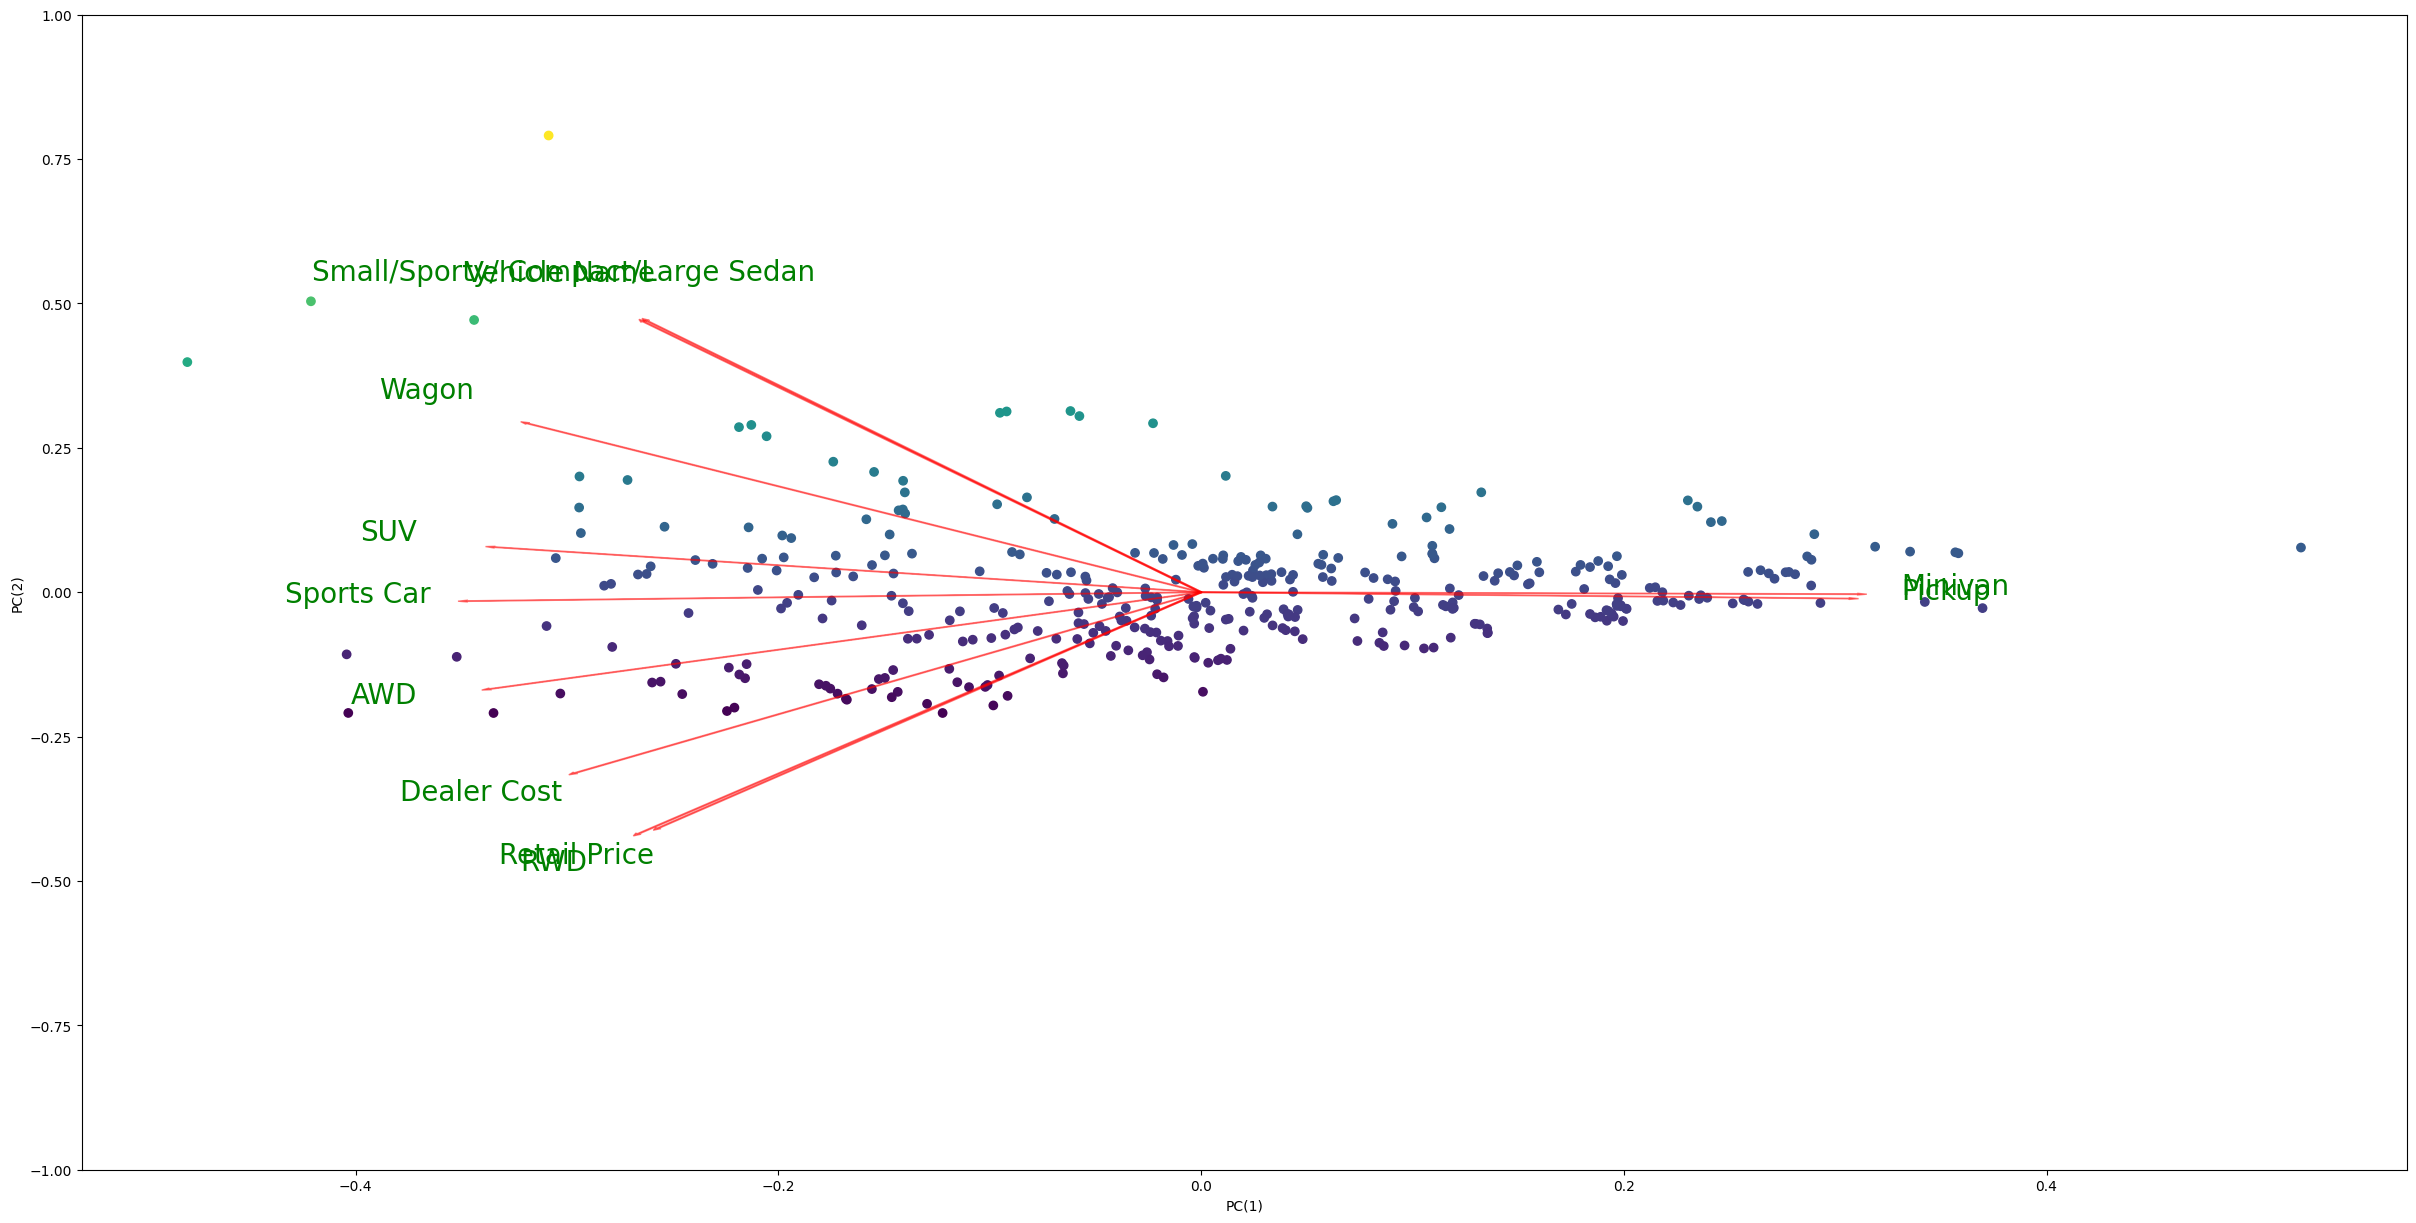

In [14]:
attributes = df.columns.values[:]

def myplot(score, coeff, labels=None):
  plt.figure(figsize=(30, 15))
  plt.xlabel(f'PC({1})')
  plt.ylabel(f'PC({2})')
  xs = score[:, 0]
  ys = score[:, 1]
  n = coeff.shape[0]
  scalex = 1.0 / (xs.max() - xs.min())
  scaley = 1.0 / (ys.max() - ys.min())

  plt.scatter(xs * scalex, ys * scaley, c=y)
  for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
    if labels is None:
      plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, "Var" + str(i + 1), color='g', ha='center', size=20)
    else:
      plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, labels[i], color='g', ha='center', size=20)


myplot(X_pca[:, :2], np.transpose(pca.components_[:2, :]), attributes)
axes = plt.gca()
axes.set_ylim([-1.0, 1.0])
plt.show()

Wektory cech zlokalizowane blisko siebie oznaczją pozytywną korelację; kąt około 90 stopni oznacza brak korelacji, natomiast 180 stopni - korelacja negatywna. Oś pozioma odpowiada za wpływ na pierwszy komponent, natomiast oś pionowa - drugi.

### 7. Budowa eigenfaces w oparciu o zbiór danych LFW

7.1-4 Korzystając z biblioteki SciKit Learn wczytaj podzbiór zbioru danych LFW składający się z osób reprezentowanych przez co najmniej 50 róż- nych zdjęć (fetch lfw people()). W ten sposób otrzymasz zbiór zdjęć 12 różnych osób. Podziel otrzymany zbiór danych na część treningową i testową (0.7, 0.3) Dla zbioru treningowego, oblicz PCA i opierając się na otrzymanych w ten sposób 100 pierwszych komponentach głównych dokonaj redukcji wymiarowości do 100 dla zbioru treningowego i testowego. Korzystając ze zbioru treningowego o zredukowanej wymiarowości, wy- trenuj dwa wybrane modele klasyfikacji (np. MLP, SVM) oraz oblicz dokładność klasyfikacji uzyskaną dla każdej z 12 klas na zbiorze testo- wym. Zamieść w raporcie uzyskane wartości: precision, recall, f1-score. Jak zmieniają się uzyskane wyniki w przypadku redukcji do 50 wymiarów?



Liczba komponentów = 100


Klasyfikator SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.50      0.59        26
     Colin Powell       0.77      0.90      0.83        62
  Donald Rumsfeld       0.64      0.56      0.60        45
    George W Bush       0.79      0.95      0.86       161
Gerhard Schroeder       0.76      0.55      0.64        29
      Hugo Chavez       0.94      0.65      0.77        23
   Jacques Chirac       0.83      0.29      0.43        17
    Jean Chretien       0.91      0.83      0.87        12
    John Ashcroft       0.73      0.53      0.62        15
Junichiro Koizumi       0.93      0.74      0.82        19
  Serena Williams       0.93      0.78      0.85        18
       Tony Blair       0.63      0.76      0.69        41

         accuracy                           0.77       468
        macro avg       0.80      0.67      0.71       468
     weighted avg       0.77      0.77      0.76       468



Klasy

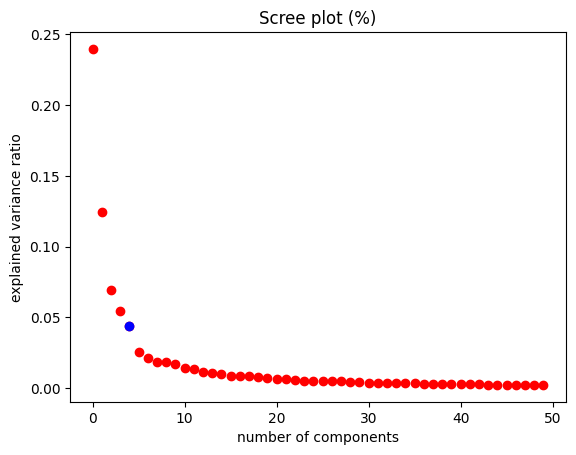

Sumaryczna wariancja tłumaczona przez 4 pierwsze komponenty: 0.9268460884796973


In [15]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

lfw_people = fetch_lfw_people(min_faces_per_person=50)
X = lfw_people.data
y = lfw_people.target
n_samples, h, w = lfw_people.images.shape
target_names = lfw_people.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

for n_components in [100, 50]:
    print("="*50)
    print(f"\n\nLiczba komponentów = {n_components}")
    pca = PCA(n_components=n_components).fit(X_train)
    eigenfaces = pca.components_.reshape((n_components, h, w))

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    for clf, clf_name in zip([SVC(C=1e4), MLPClassifier(random_state=5, max_iter=5000)], ["SVM", "MLP"]):
        print(f"\n\nKlasyfikator", clf_name)
        clf = clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        print(classification_report(y_test, y_pred, target_names=target_names))
    

plt.plot(pca.explained_variance_ratio_, 'ro')
plt.plot(4, pca.explained_variance_ratio_[4], 'bo')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.title("Scree plot (%)")
plt.show()
print("Sumaryczna wariancja tłumaczona przez 4 pierwsze komponenty:", sum(variance_ratio[:4]))

Dla klasyfikatora SVM dokładność spadła o 3 punkty procentowe, natomiast dla MLP równo o jeden punkt procentowy wraz ze zmniejszeniem liczby komponentów  ze 100 do 50. Analizując scree plot moźna dojść do wniosku, że najlepszą liczbę komponentów stanowi 4 (dla kolejnych widać załamanie na scree plocie, zatem mają one niewielkie znaczenie) Pierwsze 4 komponenty tłumaczą one łącznie 93% wariancji.

7.5 Wyświetl 20 pierwszych komponentów głównych (po uprzednim przeskalowaniu) w formie obrazu w skali szarości (eigenfaces).

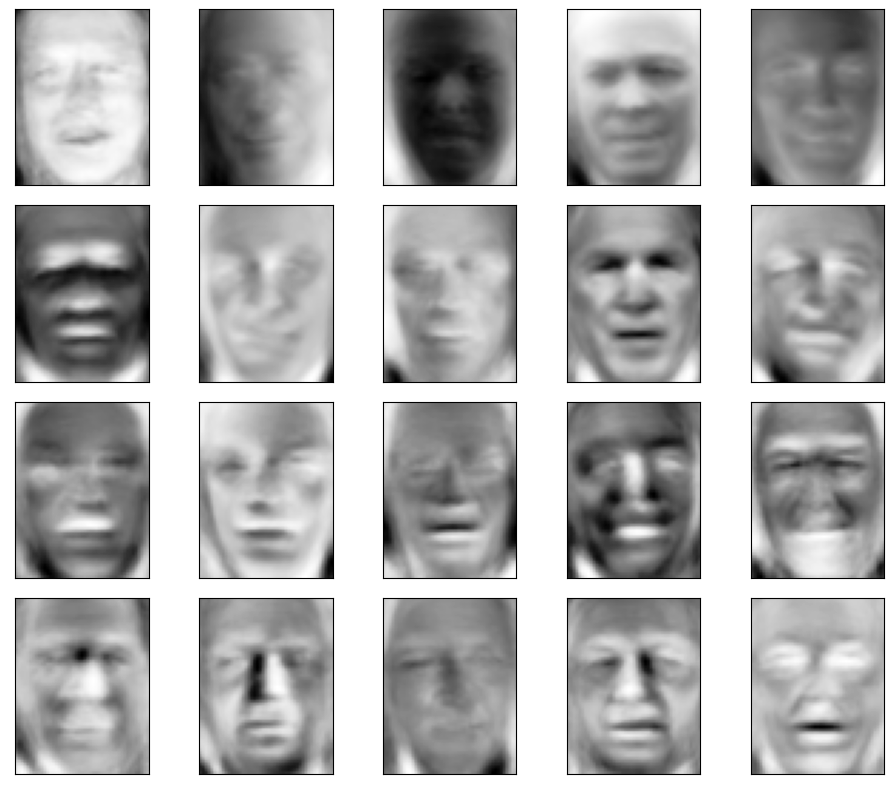

In [16]:
fig = plt.figure(figsize=(10, 8))
fig.set_tight_layout(tight=True)
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(lfw_people.images[0].shape), cmap='Greys')

Poszczególne eigenfaces ekstrahują np ogólny kształt twarzy, oświetlenie, a także bardziej specyficzne cechy, jak nos, usta, brwi.